<p style:color='green'>Cross Validation</p>

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

logreg = LogisticRegression(max_iter=10000)
scores = cross_val_score(logreg, X_scaled, y, cv=5)

print('cross-validation scores (5 folds): {}'.format(scores))
print('the average cross-validation score (5 folds): {:.2f}'.format(np.mean(scores)))

cross-validation scores (5 folds): [0.98245614 0.98245614 0.97368421 0.97368421 0.99115044]
the average cross-validation score (5 folds): 0.98


In [3]:
from sklearn.model_selection import cross_validate
import pandas as pd

res = cross_validate(logreg, X_scaled, y, cv=5, return_train_score=True)

res_df = pd.DataFrame(res)
display(res_df)
print('mean time and score:\n', res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.015619,0.00000,0.982456,0.991209
1,0.015625,0.00000,0.982456,0.989011
2,0.031241,0.00000,0.973684,0.989011
3,0.023845,0.00000,0.973684,0.991209
4,0.031245,0.03125,0.991150,0.986842


mean time and score:
 fit_time       0.023515
score_time     0.006250
test_score     0.980686
train_score    0.989456
dtype: float64


In [4]:
print('breast_cancer targets:\n{}'.format(y))

breast_cancer targets:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1

In [5]:
from sklearn.model_selection import StratifiedKFold

# stratified 3-fold splits (3 iterations)
skf = StratifiedKFold(n_splits=3)
skf.get_n_splits(X, y)

bcl = LogisticRegression()
skf_scores = cross_val_score(bcl, X_scaled, y, cv=skf)

print('cross-validation scores (3 folds): {}'.format(skf_scores))
print('the average cross-validation score (3 folds): {:.2f}'.format(np.mean(skf_scores)))

cross-validation scores (3 folds): [0.97894737 0.97368421 0.97354497]
the average cross-validation score (3 folds): 0.98


In [6]:
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=3)

print('accuracy value of cross-validation:\n{}'.format(cross_val_score(logreg, X_scaled, y, cv=k_fold)))

accuracy value of cross-validation:
[0.96315789 0.97894737 0.97354497]


In [7]:
fold_k = KFold(n_splits=3, shuffle=True, random_state=0)
print('accuracy value of cross-validation:\n{}'.format(cross_val_score(logreg, X_scaled, y, cv=fold_k)))

accuracy value of cross-validation:
[0.97894737 0.95789474 0.98941799]


In [8]:
from sklearn.model_selection import LeaveOneOut

# leave one out splits
loo = LeaveOneOut()
loo_scores = cross_val_score(logreg, X_scaled, y, cv=loo)

print('number of iterations: ', len(loo_scores))
print('the average cross validation score: {}'.format(np.mean(loo_scores)))

number of iterations:  569
the average cross validation score: 0.9789103690685413


In [9]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)

shuffle_scores = cross_val_score(logreg, X_scaled, y, cv=shuffle_split)
print('accuracy values of shuffle-split cross-validation:\n{}'.format(shuffle_scores))
print('the average cross validation score: {:.2f}'.format(np.mean(shuffle_scores)))

accuracy vaues of shuffle-split cross-validation:
[0.97894737 0.98245614 0.96491228 0.9754386  0.95087719 0.98596491
 0.97894737 0.97192982 0.96842105 0.98245614]
the average cross validation score: 0.97


<p style:color='green'>Grid Search</p>

In [10]:
from sklearn.model_selection import train_test_split

cancer_X = breast_cancer.data
cancer_y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(cancer_X, cancer_y, random_state=0)
print('train set shape: {}, test train shape: {}'.format(X_train.shape[0], X_test.shape[0]))

best_score = 0
for C in [0.001, 0.1, 1, 10]:
    # l1 regularization - lasso, l2 reg - ridge
    for penalty in ['l1', 'l2']:
        logr = LogisticRegression(C=C, penalty=penalty, solver='saga', max_iter=10000)
        logr.fit(X_train, y_train)
        l_score = logr.score(X_test, y_test)
        print('C: ', C, 'penalty: ', penalty, 'accuracy: {:.3f}'.format(l_score))

        if l_score > best_score:
            best_score = l_score
            best_parameters = {'C': C, 'penalty': penalty}

print('the best accuracy value: {:.3f}'.format(best_score))
print('the best parameter values: {}'.format(best_parameters))

train set shape: 426, test train shape: 143
C:  0.001 penalty:  l1 accuracy: 0.916
C:  0.001 penalty:  l2 accuracy: 0.944
C:  0.1 penalty:  l1 accuracy: 0.944
C:  0.1 penalty:  l2 accuracy: 0.937
C:  1 penalty:  l1 accuracy: 0.937
C:  1 penalty:  l2 accuracy: 0.937
C:  10 penalty:  l1 accuracy: 0.937
C:  10 penalty:  l2 accuracy: 0.937
the best accuracy value: 0.944
the best parameter values: {'C': 0.001, 'penalty': 'l2'}


In [11]:
from sklearn.svm import SVC

best_svc = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        s_score = svm.score(X_test, y_test)

        if s_score > best_svc:
            best_svc = s_score
            best_svc_parameters = (gamma, C)

print('best SVM score: ', best_svc)
print('best parameters: ', best_svc_parameters)

best SVM score:  0.9300699300699301
best parameters:  (0.001, 1)


In [12]:
from sklearn.tree import DecisionTreeClassifier

best_dt = 0
for max_depth in [1, 2, 3, 5, 7, 9, 11]:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    dt.fit(X_train, y_train)
    d_score = dt.score(X_test, y_test)

    if d_score > best_dt:
        best_dt = d_score
        best_dt_param = max_depth

print('best dt score: ', best_dt)
print('best dt max_depth param: ', best_dt_param)

best dt score:  0.9370629370629371
best dt max_depth param:  2


In [13]:
# grid search using sklearn lib
from sklearn.model_selection import GridSearchCV

lr_grid = {'C': [0.001, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid_search_lr = GridSearchCV(LogisticRegression(solver='saga', max_iter=10000), lr_grid)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
grid_search_lr.fit(X_train, y_train)
score_gs = grid_search_lr.score(X_test, y_test)

print('test score:', score_gs)
print('best params: ', grid_search_lr.best_params_)
print('best score: ', grid_search_lr.best_score_)
print('whole args view :', grid_search_lr.best_estimator_)

results = pd.DataFrame(grid_search_lr.cv_results_)
display(results.head())

test score: 0.9440559440559441
best params:  {'C': 0.001, 'penalty': 'l2'}
best score:  0.9130506155950752
whole args view : LogisticRegression(C=0.001, max_iter=10000, solver='saga')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.502404,0.138890,0.000256,0.000512,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.965116,0.858824,0.894118,0.941176,0.905882,0.913023,0.037020,2
1,0.435685,0.070410,0.000000,0.000000,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.953488,0.870588,0.929412,0.894118,0.917647,0.913051,0.028585,1
2,0.638756,0.073445,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.953488,0.858824,0.929412,0.894118,0.917647,0.910698,0.032235,3
3,0.477640,0.022961,0.000000,0.000000,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.953488,0.858824,0.917647,0.894118,0.917647,0.908345,0.031195,4
4,0.643096,0.044727,0.000000,0.000000,1,l1,"{'C': 1, 'penalty': 'l1'}",0.953488,0.858824,0.917647,0.894118,0.917647,0.908345,0.031195,4


In [70]:
# grid search using sklearn lib
from sklearn.model_selection import GridSearchCV

grid1 = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
gs1 = GridSearchCV(SVC(), grid1, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
gs1.fit(X_train, y_train)
score1 = gs1.score(X_test, y_test)

print('test score:', score1)
print('best params: ', gs1.best_params_)
print('best score: ', gs1.best_score_)
print('whole args view :', gs1.best_estimator_)

results1 = pd.DataFrame(gs1.cv_results_)
display(results1.head())

test score: 0.9300699300699301
best params:  {'C': 1, 'gamma': 0.001}
best score:  0.9223803009575923
whole args view : SVC(C=1, gamma=0.001)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015736,0.000197,0.002923,0.005847,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
1,0.015616,0.000028,0.001508,0.003016,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
2,0.016930,0.002585,0.000000,0.000000,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
3,0.016887,0.002510,0.013772,0.009687,0.001,1,"{'C': 0.001, 'gamma': 1}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
4,0.027943,0.005627,0.014064,0.001162,0.001,10,"{'C': 0.001, 'gamma': 10}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6


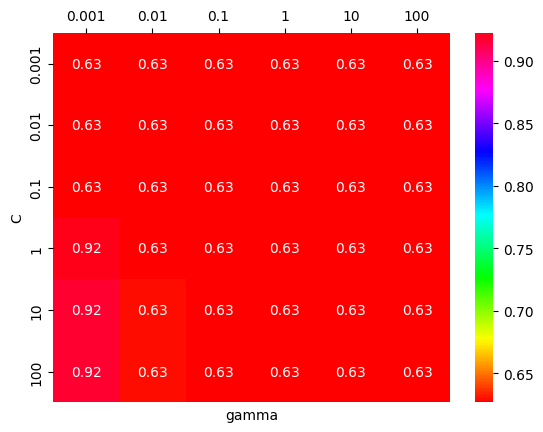

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

sc = np.array(results1.mean_test_score).reshape(6, 6)
ax = sns.heatmap(sc, annot=True, xticklabels=grid1['gamma'], yticklabels=grid1['C'], cmap='hsv')
ax.set(xlabel='gamma', ylabel='C')
ax.xaxis.tick_top()

plt.show()

In [15]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=0)
print('train set shape: {}, validation set shape: {}, test set shape: {}'.format(X_train.shape[0], X_valid.shape[0],
                                                                                 X_test.shape[0]))

grid_lr = GridSearchCV(LogisticRegression(solver='saga', max_iter=10000), lr_grid)
grid_lr.fit(X_train, y_train)
validation_score = grid_lr.score(X_valid, y_valid)

print('best validation score: ', validation_score)
print('best params: ', grid_lr.best_params_)
print('best score: ', grid_lr.best_score_)

new_logreg = LogisticRegression(solver='saga', max_iter=10000, **grid_lr.best_params_)
new_logreg.fit(X_trainval, y_trainval)
test_score = new_logreg.score(X_test, y_test)

print('accuracy on test set with best params: ', test_score)

train set shape: 319, validation set shape: 107, test set shape: 143
best validation score:  0.8598130841121495
best params:  {'C': 0.1, 'penalty': 'l1'}
best score:  0.9436507936507936
accuracy on test set with best params:  0.9440559440559441


In [61]:
best_lr = 0
for C in [0.001, 0.1, 1, 10]:
    for penalty in ['l1', 'l2']:
        lr = LogisticRegression(solver='saga', max_iter=10000, C=C, penalty=penalty)
        scoress = cross_val_score(lr, X_trainval, y_trainval, cv=5)
        score = np.mean(scoress)

        if score > best_lr:
            best_lr = score
            best_params = {'C': C, 'penalty': penalty}

print('best logistic regression score: ', best_lr)
print('best params: ', best_params)

new_lr = LogisticRegression(solver='saga', max_iter=10000, **best_params).fit(X_trainval, y_trainval)
score_test = new_lr.score(X_test, y_test)
print('test accuracy: ', score_test)

best logistic regression score:  0.9130506155950752
best params:  {'C': 0.001, 'penalty': 'l2'}
test accuracy:  0.9440559440559441


In [19]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('best param values: {}'.format(grid_search.best_params_))
print('best cross-val accuracy value: {:.2f}'.format(grid_search.best_score_))

ress = pd.DataFrame(grid_search.cv_results_)
ress

best param values: {'C': 0.1, 'kernel': 'linear'}
best cross-val accuracy value: 0.96


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006248,0.007652,0.006249,0.007653,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.625000,0.640625,0.640625,0.640625,0.634921,0.636359,0.006094,10
1,0.009507,0.007766,0.000316,0.000632,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.625000,0.640625,0.640625,0.640625,0.634921,0.636359,0.006094,10
2,0.008395,0.010828,0.003433,0.006124,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.625000,0.640625,0.640625,0.640625,0.634921,0.636359,0.006094,10
3,0.009373,0.007653,0.006255,0.007661,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.625000,0.640625,0.640625,0.640625,0.634921,0.636359,0.006094,10
4,0.009367,0.007648,0.003129,0.006258,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.625000,0.640625,0.640625,0.640625,0.634921,0.636359,0.006094,10
5,0.012199,0.012735,0.004684,0.006247,0.001,100,rbf,"{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}",0.625000,0.640625,0.640625,0.640625,0.634921,0.636359,0.006094,10
6,0.006144,0.003907,0.008367,0.007559,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.625000,0.640625,0.640625,0.640625,0.634921,0.636359,0.006094,10
7,0.018852,0.003923,0.008049,0.001145,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.625000,0.640625,0.640625,0.640625,0.634921,0.636359,0.006094,10
8,0.026113,0.020659,0.002092,0.004185,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.625000,0.640625,0.640625,0.640625,0.634921,0.636359,0.006094,10
9,0.003124,0.006249,0.012497,0.006249,0.01,1,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",0.625000,0.640625,0.640625,0.640625,0.634921,0.636359,0.006094,10


In [16]:
param_grid1 = [
    {'solver': ['saga'], 'C': [0.1, 1, 10], 'penalty': ['elasticnet'], 'l1_ratio': [0.2, 0.5, 0.8]},
    {'solver': ['saga'], 'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
    {'solver': ['lbfgs'], 'C': [0.1, 1, 10], 'penalty': ['l2']}
]
grid_search1 = GridSearchCV(LogisticRegression(max_iter=10000), param_grid1, cv=5)
grid_search1.fit(X_trainval, y_trainval)

print('best param values: {}'.format(grid_search1.best_params_))
print('best cross-val accuracy value: {:.2f}'.format(grid_search1.best_score_))

ress1 = pd.DataFrame(grid_search1.cv_results_)
ress1

best param values: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
best cross-val accuracy value: 0.96


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_l1_ratio,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.674945,0.153823,0.000000,0.000000,0.1,0.2,elasticnet,saga,"{'C': 0.1, 'l1_ratio': 0.2, 'penalty': 'elasti...",0.953488,0.858824,0.917647,0.894118,0.917647,0.908345,0.031195,6
1,0.598247,0.025637,0.000000,0.000000,0.1,0.5,elasticnet,saga,"{'C': 0.1, 'l1_ratio': 0.5, 'penalty': 'elasti...",0.953488,0.858824,0.917647,0.894118,0.917647,0.908345,0.031195,6
2,0.662989,0.058078,0.000000,0.000000,0.1,0.8,elasticnet,saga,"{'C': 0.1, 'l1_ratio': 0.8, 'penalty': 'elasti...",0.953488,0.858824,0.929412,0.894118,0.917647,0.910698,0.032235,4
3,0.707812,0.090939,0.000000,0.000000,1,0.2,elasticnet,saga,"{'C': 1, 'l1_ratio': 0.2, 'penalty': 'elasticn...",0.953488,0.858824,0.917647,0.894118,0.917647,0.908345,0.031195,6
4,0.624772,0.021910,0.000000,0.000000,1,0.5,elasticnet,saga,"{'C': 1, 'l1_ratio': 0.5, 'penalty': 'elasticn...",0.953488,0.858824,0.917647,0.894118,0.917647,0.908345,0.031195,6
5,0.623691,0.030731,0.000000,0.000000,1,0.8,elasticnet,saga,"{'C': 1, 'l1_ratio': 0.8, 'penalty': 'elasticn...",0.953488,0.858824,0.917647,0.894118,0.917647,0.908345,0.031195,6
6,0.701795,0.031361,0.003125,0.006249,10,0.2,elasticnet,saga,"{'C': 10, 'l1_ratio': 0.2, 'penalty': 'elastic...",0.953488,0.858824,0.917647,0.894118,0.917647,0.908345,0.031195,6
7,0.794977,0.052686,0.000000,0.000000,10,0.5,elasticnet,saga,"{'C': 10, 'l1_ratio': 0.5, 'penalty': 'elastic...",0.953488,0.858824,0.917647,0.894118,0.917647,0.908345,0.031195,6
8,0.633363,0.025593,0.000000,0.000000,10,0.8,elasticnet,saga,"{'C': 10, 'l1_ratio': 0.8, 'penalty': 'elastic...",0.953488,0.858824,0.917647,0.894118,0.917647,0.908345,0.031195,6
9,0.588053,0.020702,0.000000,0.000000,0.1,NaN,l1,saga,"{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}",0.953488,0.858824,0.929412,0.894118,0.917647,0.910698,0.032235,4


In [17]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []

    for training_samples, test_samples in outer_cv.split(X, y):

        best_score = -np.inf
        for parameters in parameter_grid:
            cv_scores = []

            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters

        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [21]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold

sco = nested_cv(breast_cancer.data, breast_cancer.target, StratifiedKFold(5), StratifiedKFold(5), SVC,
                ParameterGrid(param_grid))

print('cross validation accuracy values: {}'.format(sco))

cross validation accuracy values: [0.93859649 0.93859649 0.97368421 0.94736842 0.95575221]


<p style:color='green'>Model Evaluation Metrics</p>

In [26]:
# 212 examples belonging to class 0, 357 examples of class 1
# slightly imbalances dataset (63% - class 1, 37% - class 0)

print(np.unique(y, return_counts=True))

(array([0, 1]), array([212, 357], dtype=int64))


In [33]:
from sklearn.metrics import accuracy_score

logreg.fit(X, y)
y_pred = logreg.predict(X)
print('accuracy of the trained model is', round(accuracy_score(y, y_pred), 3))

accuracy of the trained model is 0.963


C:\Users\User\PycharmProjects\BigDataLabs\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
from sklearn.dummy import DummyClassifier

# remove some data in malignant class and then train new data
X_malignant = X[y == 0]
y_malignant = y[y == 0]
X_benign = X[y == 1]
y_benign = y[y == 1]
X_new = np.r_[X_benign, X_malignant[:50]]
y_new = np.r_[y_benign, y_malignant[:50]]
print(np.unique(y_new, return_counts=True))

# dummy classifier always predicts the most frequent value occurred in the training set and its accuracy of 88%.
# which means that the accuracy can't be used to evaluate model trained on imbalanced data set
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_new, y_new)
pred_dummy = dummy.predict(X_new)

print(np.unique(pred_dummy, return_counts=True))
print('accuracy of the dummy classifier is', round(accuracy_score(y_new, pred_dummy), 2))

(array([0, 1]), array([ 50, 357], dtype=int64))
(array([1]), array([407], dtype=int64))
accuracy of the dummy classifier is 0.88


In [40]:
from sklearn.metrics import confusion_matrix

# the log reg model correctly classified 200 out of 212 examples as malignant tumor and 348 out of 357 as benign
# 12 of the harmful tumors were predicted as harmless and 9 harmless ones as harmful
matrix_c = confusion_matrix(y, y_pred)
print(matrix_c)
print('accuracy score of the model is', round(accuracy_score(y_pred, y), 2))

[[200  12]
 [  9 348]]
accuracy score of the model is 0.96


<Axes: >

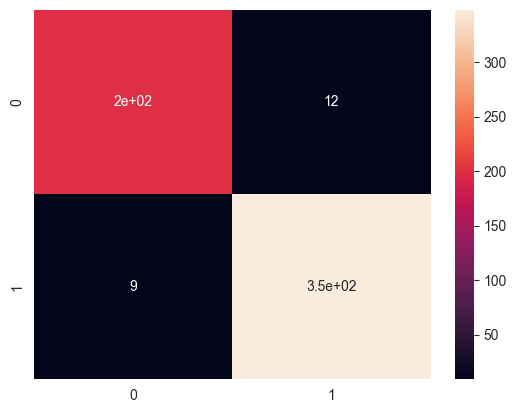

In [41]:
import seaborn as sns

sns.heatmap(matrix_c, annot=True)

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       212
           1       0.97      0.97      0.97       357

    accuracy                           0.96       569
   macro avg       0.96      0.96      0.96       569
weighted avg       0.96      0.96      0.96       569
